In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)



FileNotFoundError: [Errno 2] No such file or directory: 'train-images-idx3-ubyte.gz'

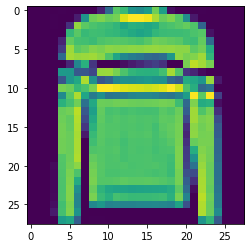

In [36]:
plt.imshow(data[5])


In [37]:
g = gzip.open('train-labels-idx1-ubyte.gz', 'r')
g.read(8)
buf = g.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int)
print(labels[:10])

[9 0 0 3 0 2 7 2 5 5]


In [38]:
labels.shape

(60000,)

In [39]:
data.shape

(60000, 28, 28)

In [40]:
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size)


In [41]:
data_test.shape

(10000, 28, 28)

In [42]:
data_all = np.concatenate((data, data_test), axis=0)
data_all.shape

(70000, 28, 28)

In [43]:
g = gzip.open('t10k-labels-idx1-ubyte.gz', 'r')
g.read(8)
buf = g.read(num_images)
labels_t = np.frombuffer(buf, dtype=np.uint8).astype(np.int)
print(labels_t.shape)

(10000,)


In [44]:
labels_all = np.concatenate((labels, labels_t), axis=0)

In [45]:
labels_all.shape

(70000,)

In [35]:
#data_all.dump('fmnist_images.npy')

In [46]:
labels_all.dump('fmnist_labels.npy')

In [27]:
labels_all.max()m

9

In [56]:
data = np.load('fmnist_images.npy', allow_pickle=True)

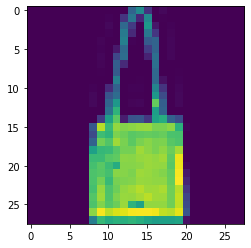

In [39]:
plt.imshow(data[200])

In [41]:
import os
img_list = os.listdir('./coil-20-proc')

In [45]:
from PIL import Image
coil_20 = []
for img_name in img_list:
    I = np.asarray(Image.open(os.path.join('./coil-20-proc', img_name)))
    coil_20.append(I)
    
coil_20 = np.array(coil_20)
coil_20.shape

(1440, 128, 128)

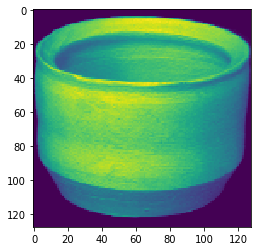

In [46]:
plt.imshow(coil_20[0])

In [47]:
coil_20.dump('coil_20.npy')

In [50]:
coil_20_labels = []
for img_name in img_list:
    if img_name[4] == '_':
        coil_20_labels.append(int(img_name[3]))
    else:
        coil_20_labels.append(int(img_name[3:5]))
coil_20_labels = np.array(coil_20_labels)
coil_20_labels.shape

(1440,)

In [54]:
coil_20_labels.min()

1

In [55]:
coil_20_labels.dump('coil_20_labels.npy')

In [58]:
data.shape

(70000, 28, 28)

In [59]:
coil_20.shape

(1440, 128, 128)

In [2]:
import os
from PIL import Image

img_list = os.listdir('./coil-100/')
coil_100 = []
for img_name in img_list:
    if img_name == '.DS_Store':
        continue
    I = np.asarray(Image.open(os.path.join('./coil-100/', img_name)))
    coil_100.append(I)
    
coil_100 = np.array(coil_100)
coil_100.shape

(7200, 128, 128, 3)

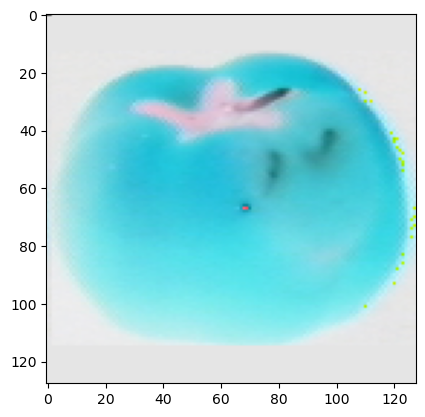

In [3]:
plt.imshow(coil_100[5])

In [4]:
coil_100_labels = []
for img_name in img_list:
    if img_name == '.DS_Store':
        continue
    if img_name[4] == '_':
        coil_100_labels.append(int(img_name[3]))
    elif img_name[5] == '_':
        coil_100_labels.append(int(img_name[3:5]))
    else:
        coil_100_labels.append(int(img_name[3:6]))
coil_100_labels = np.array(coil_100_labels)
coil_100_labels.shape

(7200,)

In [6]:
coil_100.dump('coil_100.npy')
coil_100_labels.dump('coil_100_labels.npy')